<a href="https://colab.research.google.com/github/IsWallison/Panorama_COVID_19/blob/main/Projeto_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

sns.set_style()
%matplotlib inline

# importar o dataset COVID-19 para um DataaFrame


## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*


* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


Obtendo o dataset, atribuindu-o a uma variável e visualizando os 5 primeiros registro.


In [2]:
df_inicial = pd.read_csv('https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true')

In [3]:
df_inicial.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Discionário de variáveis, para ajudar no entendimento geral da análise.

In [4]:
#for i in df.columns:
  #print(f'* {i} - ')

### Dicionário de Variáveis

Os atributos do dataset estão descritos abaixo.
A descrição completa pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).


Atributo  | Descrição 
------------|-----------
iso_code | códigos de país de três letras
continent | Continente da localização geográfica
location | Localização geográfica
date | Data da observação
total_cases | Total de casos confirmados de COVID-19¹
new_cases | New confirmed cases of COVID-19¹ ²
new_cases_smoothed |Novos casos confirmados de COVID-19 (suavizado de 7 dias¹
total_deaths | Total de mortes atribuídas ao COVID-19
new_deaths | Novas mortes atribuídas ao COVID-19¹ ²
new_deaths_smoothed | Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias)¹
total_cases_per_million | Total de casos confirmados de COVID-19 por 1.000.000 de pessoas¹
new_cases_per_million | Novos de casos confirmados de COVID-19 por 1.000.000 de pessoas¹
new_cases_smoothed_per_million | Novos casos confirmados de COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas¹
total_deaths_per_million | Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas¹
new_deaths_per_million | Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas¹
new_deaths_smoothed_per_million | Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias) por 1.000.000 de pessoas¹
reproduction_rate | Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19. [ver link](https://github.com/crondonm/TrackingR/tree/main/Estimates-Database)
icu_patients | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia
icu_patients_per_million | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 pessoas
hosp_patients | Número de pacientes com COVID-19 no hospital em um determinado dia
hosp_patients_per_million | Número de pacientes com COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas
weekly_icu_admissions | Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores)
weekly_icu_admissions_per_million | Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana por 1.000.000 pessoas (data de notificação e 6 dias anteriores)
weekly_hosp_admissions | Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores)
weekly_hosp_admissions_per_million | Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas (data do relatório e 6 dias anteriores)
total_tests | Total de testes para COVID-19
new_tests | Novos testes para COVID-19 (calculado apenas para dias consecutivos)
total_tests_per_thousand | Total de testes para COVID-19 por 1.000 pessoas
new_tests_per_thousand | Novos testes para COVID-19 por 1.000 pessoas
new_tests_smoothed | Novos testes para COVID-19 (suavizado de 7 dias).
new_tests_smoothed_per_thousand | Novos testes para COVID-19 (suavizado de 7 dias) por 1.000 pessoas
positive_rate | A parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)
tests_per_case | Testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate)
tests_units | Unidades usadas pelo local para relatar seus dados de teste
total_vaccinations | Número total de doses de vacinação COVID-19 administradas
people_vaccinated | Número total de pessoas que receberam pelo menos uma dose de vacina
people_fully_vaccinated | Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial
total_boosters | Número total de doses de reforço de vacinação COVID-19 administradas
new_vaccinations | Novas doses de vacinação COVID-19 administradas
new_vaccinations_smoothed | Novas doses de vacinação COVID-19 administradas (suavizado por 7 dias)
total_vaccinations_per_hundred | Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total
people_vaccinated_per_hundred | Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total
people_fully_vaccinated_per_hundred | Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial por 100 pessoas na população total
total_boosters_per_hundred | Número total de doses de reforço de vacinação COVID-19 administradas por 100 pessoas na população total
new_vaccinations_smoothed_per_million | Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total
new_people_vaccinated_smoothed | Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias)
new_people_vaccinated_smoothed_per_hundred | Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias) por 100 pessoas na população total
stringency_index | Índice de Rigidez de Resposta do Governo reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa) 
population | População
population_density | Número de pessoas dividido por área de terra, medido em quilômetros quadrados (ano mais recente disponível)
median_age | Idade média da população (projeção da ONU para 2020)
aged_65_older | Parcela da população com 65 anos ou mais (ano mais recente disponível)
aged_70_older | Parcela da população com 70 anos ou mais em 2015
gdp_per_capita | Produto interno bruto em paridade de poder de compra, em dólares internacionais constantes de 2011 (ano mais recente disponível)
extreme_poverty | Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010
cardiovasc_death_rate | Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas)
diabetes_prevalence | Prevalência de diabetes (% da população de 20 a 79 anos) em 2017
female_smokers | Proporção de mulheres que fumam (ano mais recente disponível)
male_smokers | Proporção de homens que fumam (ano mais recente disponível)
handwashing_facilities | Percentagem da população com instalações básicas de lavagem das mãos nas instalações (ano mais recente disponível)
hospital_beds_per_thousand | Camas hospitalares por 1.000 pessoas (ano mais recente disponível desde 2010)
life_expectancy | Expectativa de vida ao nascer em 2019
human_development_index | IDH - Índice de Desenvolvimento Humano (valores para 2019)
excess_mortality | Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período
excess_mortality_cumulative | Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período
excess_mortality_cumulative_absolute | Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período
excess_mortality_cumulative_per_million | Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período

Uma vez que o dataset também possui valores por continentes, os valores dos continentes serão desconsiderados, uma vez que a análise será por países. Primeiramente será criada uma lista com as regiões que se deseja remover, em seguida crio uma variável para receber os valores dos dataframe antigo, porém sem os valores descartados.

In [5]:
lista_regioes = ['High income','Upper middle income', 'Europe', "Asia" ,'Lower middle income' ,'South America','European Union','North America']
df = df_inicial[~df_inicial['location'].isin(lista_regioes)].copy()


In [6]:
df_linhas = df.shape[0]
df_colunas = df.shape[1]
print(f'Analisando o novo dataset sem os continêntes temos: {df_linhas} linhas e {df_colunas} colunas')

Analisando o novo dataset sem os continêntes temos: 232413 linhas e 67 colunas


Vamos ver a quantidade, se há muitos dados faltantes, quais os formatos e processar de acordo o necessário.

In [7]:
print('Atributos:')
for i, col in enumerate(df.columns):
  print(f'Col {i:2} : {col:45} : {df[col].dtype}')

Atributos:
Col  0 : iso_code                                      : object
Col  1 : continent                                     : object
Col  2 : location                                      : object
Col  3 : date                                          : object
Col  4 : total_cases                                   : float64
Col  5 : new_cases                                     : float64
Col  6 : new_cases_smoothed                            : float64
Col  7 : total_deaths                                  : float64
Col  8 : new_deaths                                    : float64
Col  9 : new_deaths_smoothed                           : float64
Col 10 : total_cases_per_million                       : float64
Col 11 : new_cases_per_million                         : float64
Col 12 : new_cases_smoothed_per_million                : float64
Col 13 : total_deaths_per_million                      : float64
Col 14 : new_deaths_per_million                        : float64
Col 15 : new_death

dando destaque para coluna 'date' que esta em formato de objeto e que deve ser convertida para datetime, uma vez que se refere as datas dos dados, facilitando assim a manipulação.

In [8]:
df['date']=pd.to_datetime(df['date'])

Agora iremos vizualizar algumas estatisticas dos valores numéricos, Com uma descrição dos valores teremos acesso à contagem, média, padrão, mínimo, máximo, bem como percentis inferior, 50 e superior. Por padrão, o percentil inferior é 25 e o percentil superior é 75. O percentil 50 é igual à mediana.

In [9]:

df[['total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','population','new_tests','new_vaccinations']].describe().round(2)


,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,population,new_tests,new_vaccinations
count,2.184910e+05,218175.00,199215.00,199032.00,217457.00,2.313790e+05,75403.00,51041.00
mean,2.382819e+06,6037.43,38957.99,68.02,65017.58,8.173885e+07,67285.41,485318.23
std,2.316517e+07,62162.19,320731.13,565.38,114337.41,5.606158e+08,247734.00,2821207.77
min,1.000000e+00,0.00,1.00,0.00,0.00,4.700000e+01,1.00,0.00
25%,4.396000e+03,0.00,109.00,0.00,1123.45,7.824570e+05,2244.00,3050.00
50%,4.532600e+04,38.00,1014.00,0.00,10600.68,6.630621e+06,8783.00,21150.00
75%,4.481120e+05,684.00,8259.00,9.00,77433.28,2.816055e+07,37229.00,118594.00
max,6.462911e+08,4083952.00,6643886.00,17733.00,690003.54,7.975105e+09,35855632.00,49677465.00


Foram identificados alguns valores nulos/ausentes.

Para analisar a porcentagem de valores ausentes, vamos achar a quantidade total de valores ausentes e dividir pelo total de linhas, posteriormente multiplicar por 100 para achar o valor em porcentagem, a ordem será colocada do maior para a menor.

In [10]:
#nulos
((df.isnull().sum())/df.shape[0]).sort_values(ascending=False).round(2)
     

weekly_icu_admissions                      0.97
weekly_icu_admissions_per_million          0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality_cumulative                0.97
excess_mortality_cumulative_absolute       0.97
                                           ... 
continent                                  0.02
population                                 0.00
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Temos dados ausente em praticamente todas as colunas, population, date,location e iso_code são as unicas que não possuem dados ausentes. Esses dados faltante pode significar várias coisas diferentes, talvez o campo não fosse aplicável, ou os dados não estavam disponíveis. Pode ser que a pessoa que inseriu os dados não sabia o valor certo, ou não se preocupou que um campo não fosse preenchido.

Agora iremos analisar os números de casos e mortes por covid, para descobrirmos que conclusões poderemos chegar.

Primeiramente vou criar 3 novar variáveis(cases,populations e death) e atribuir a elas os maiores valores de casos, população e mortes.
Em seguida vamosvamos descobrir as regiões que possuem que tem a maior quantidade absoluta de mortes por covid-19 e os pises com maior número de casos. 

In [11]:
cases = (df.groupby('location')['total_cases'].max())
population = (df.groupby('location')['population'].max())
deaths=(df.groupby('location')['total_deaths'].max())

In [12]:
deaths.sort_values(ascending=False)[0:10]

location
World             6643886.0
United States     1082224.0
Brazil             690229.0
India              530638.0
Russia             384437.0
Mexico             330602.0
Africa             257332.0
Peru               217542.0
United Kingdom     212296.0
Italy              181733.0
Name: total_deaths, dtype: float64

Em relação às mortes, os países que lideravam aos 07 de Dezembro de 2022 em relação ao numero de mortes eram:

* Estados Unidos - 1.082.224 de mortes;
* Brasil - 690.229 de mortes;
* India - 530.638.0 de mortes;
* Rússia - 384.437 de mortes;
* México - 330.602 de mortes.

Grafico para visualizarmos os 5 paises com o maior numero de mortes por COVID-19

Text(0.5, 0, '')

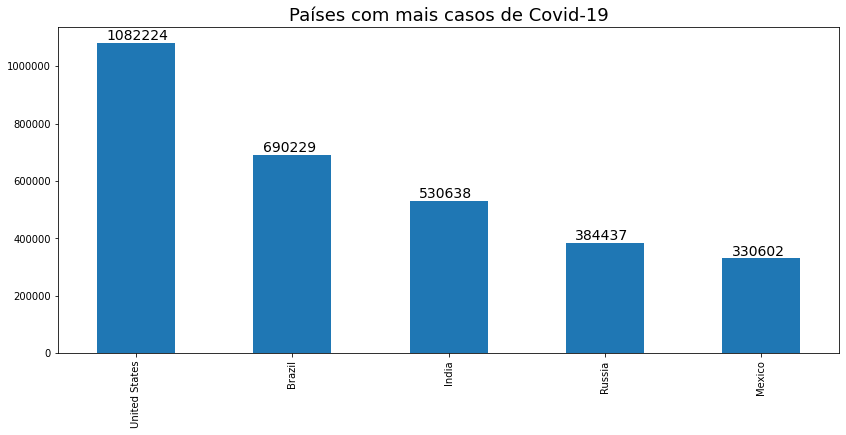

In [101]:
# gráfico de barras para total de mortes
a = (df.groupby('location')['total_deaths'].max()).sort_values(ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(14,6))
ax.ticklabel_format(axis='y', style='plain')
ax.set_title("Países com mais casos de Covid-19",fontsize=18)

for i, v in enumerate(a):
    ax.text(i-.19, 
            a[i]+10000, 
            int(a[i]), 
            fontsize=14, 
            color="black")
    
a.plot(kind='bar');
ax.set_xlabel("")

In [14]:
#relação em porcentagem do total de mortes para cada pais
((deaths/deaths.max())*100).sort_values(ascending=False)[1:11]

location
United States     16.289021
Brazil            10.388935
India              7.986862
Russia             5.786327
Mexico             4.976034
Africa             3.873215
Peru               3.274319
United Kingdom     3.195359
Italy              2.735342
Indonesia          2.409298
Name: total_deaths, dtype: float64

com o uso do loop 'for' podemos facilmente achar quanto % os três paises com mais numeros de mortes, representam do total.


In [15]:
percent_death=0
for i in range(3): 
 percent_death = percent_death + ((deaths/deaths.max())*100).sort_values(ascending=False)[i+1] 
print(f'Estados Unidos, Brazil e India são reponsáveis por {percent_death:.2f}% de todas as mortes por COVID-19 do mundo.')

Estados Unidos, Brazil e India são reponsáveis por 34.66% de todas as mortes por COVID-19 do mundo.


Estados Unidos, Brazil e India são o top 3 países com maior número de pessoas que faleceram de covid-19 representando mais de 34% de todas as mortes do mundo.


In [16]:
cases.sort_values(ascending=False)[0:10]

location
World             646291109.0
United States      99077996.0
India              44675172.0
France             38223893.0
Germany            36649979.0
Brazil             35396191.0
South Korea        27483568.0
Japan              25427492.0
Italy              24488080.0
United Kingdom     24024746.0
Name: total_cases, dtype: float64

Em relação aos casos, os países que lideravam aos 07 de Dezembro de 2022 eram:

* United States - 99.077.996
* India - 44.675.172 
* France - 38.223.893

Olhando esses dados uma questão interessante surge, a Fraça tem mais casos que o Brazil, porém tem menos mortes, alguma hipóteses para a frança ter menos mortes são: 
* O pais ter testado mais pessoas.
* A população pode de alguma forma ser mais resistente.
* A população pode ter sido vacinada de forma mais rapida e eficiente.

Analisando um pouco mais a fundo essa relação de casos e mortes entre o Brazil e França.

In [17]:
france_case = df[df['location']=='France']['total_cases'].max()
brazil_case = df[df['location']=='Brazil']['total_cases'].max()

france_death = df[df['location']=='France']['total_deaths'].max()
brazil_death = df[df['location']=='Brazil']['total_deaths'].max()

print(f'Na França tiveram {int(france_case)} casos e {int(france_death)} mortes. ')
print(f'Na Brasil tiveram {int(brazil_case)} casos e {int(brazil_death)} mortes. ')
x_death = (brazil_death)*100/(france_death)
x_cases = (france_case-brazil_case)*100/(france_case)
print(f'o Brasil teve {x_death:.2f}% mais mortes que a frança e {x_cases:.2f}% menos casos de COVID-19 que a França. ')

Na França tiveram 38223893 casos e 159431 mortes. 
Na Brasil tiveram 35396191 casos e 690229 mortes. 
o Brasil teve 432.93% mais mortes que a frança e 7.40% menos casos de COVID-19 que a França. 


Para fazer as analises irei criar dois novos dataset referentes ao Brazil para analisar a relação da vacinação dos dois paises.

In [18]:
df_brasil = df[(df['location']=="Brazil")].copy()
df_france = df[(df['location']=="France") ].copy()
df_world = df[df['location']=="World"].copy()

df_brasil = df_brasil.set_index('date')
df_france = df_france.set_index('date')

vacinação por total da população

In [19]:
df_population_vaccinated_france = df_france['people_vaccinated']/df_france['population']
df_population_vaccinated_brasil = df_brasil['people_vaccinated']/df_brasil['population']

df_tested_france = df_france['total_tests']
df_tested_brasil = df_brasil['total_tests']

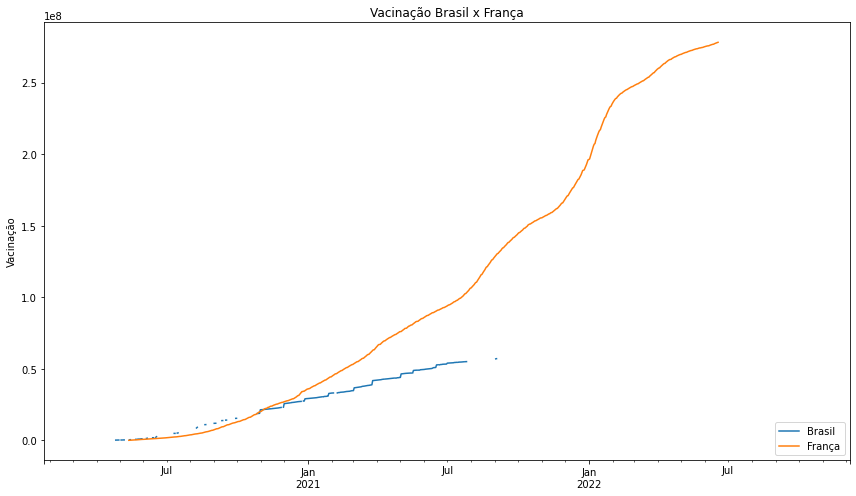

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
df_tested_brasil.plot(kind='line',ax=ax,label='Brasil')
ax.set_title("Vacinação Brasil x França")
ax.set_ylabel("Vacinação")


df_tested_france.plot(kind="line",ax=ax,label='França')

ax.set_xlabel("")

plt.tight_layout()
plt.legend(loc='lower right')

Os dados referentes as pessoas testadas no brasil estão faltando, inviabilizando assim entao a comparação entre as pessoas testadas no Brasil e França.

Agora iremos analisar a vacinaçao dos dois paises.

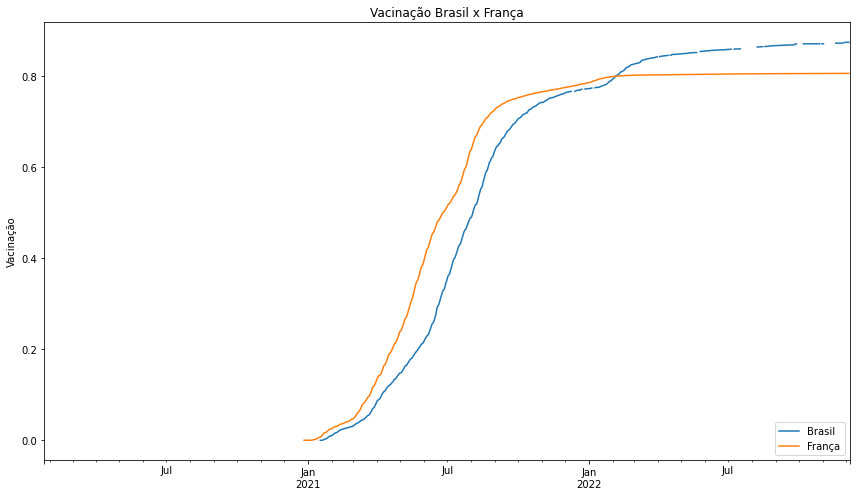

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
df_population_vaccinated_brasil.plot(kind='line',ax=ax,label='Brasil')
ax.set_title("Vacinação Brasil x França")
ax.set_ylabel("Vacinação")

df_population_vaccinated_france.plot(kind="line",ax=ax,label='França')
ax.set_xlabel("")

plt.tight_layout()
plt.legend(loc='lower right')

Bao exitem tanta diferença na taxa de vacinaçao da populaçao dos dois paises.

Uma vez que os dados dos testes do brasil estão faltando, nao foi possivel confirmar o real motivo do brasil ter menos casos e mais mortes que a frança.

Seguindo em frente iremos analisar os paises com a maior porcentagem de mortes em relação a sua populaçao total.


In [22]:
#morte por total da população
((deaths/population)*100).sort_values(ascending=False)[:5].round(2)

location
Peru                      0.64
Bulgaria                  0.56
Bosnia and Herzegovina    0.50
Hungary                   0.48
North Macedonia           0.46
dtype: float64

Peru, Bulgaria e Bosnia and Herzegovina são os paises com a maior taxa de morte por população.

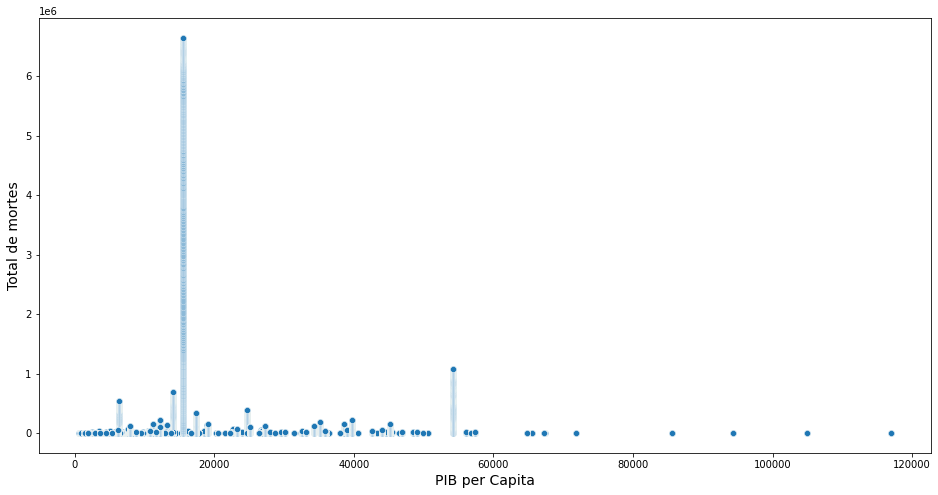

In [23]:

# plotando disperão do número de mortos por renda per capita
plt.figure(figsize = (16, 8))
sns.scatterplot(data=df, x='gdp_per_capita', y='total_deaths')
plt.xlabel("PIB per Capita", size = 14)
plt.ylabel("Total de mortes", size = 14)
plt.show()
     

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [24]:
#primeiro caso de covid no brasil
primeiro_caso = df_brasil[df_brasil['total_cases'] > 0 ][:1]
print(f'O primeiro caso no brasil occoreu em : {primeiro_caso.index[0]}')

O primeiro caso no brasil occoreu em : 2020-02-26 00:00:00


In [25]:
#primeiro morte de covid no brasil
primeira_morte = df_brasil[df_brasil['total_deaths'] > 0 ][:1]
print(f'a primeira morte no brasil occoreu em : {primeira_morte.index[0]}')

a primeira morte no brasil occoreu em : 2020-03-17 00:00:00


In [26]:
diferenca_morte = (primeira_morte.index-primeiro_caso.index)
print(f'foram {diferenca_morte[0]} do primeiro caso até a primeira morte')


foram 20 days 00:00:00 do primeiro caso até a primeira morte


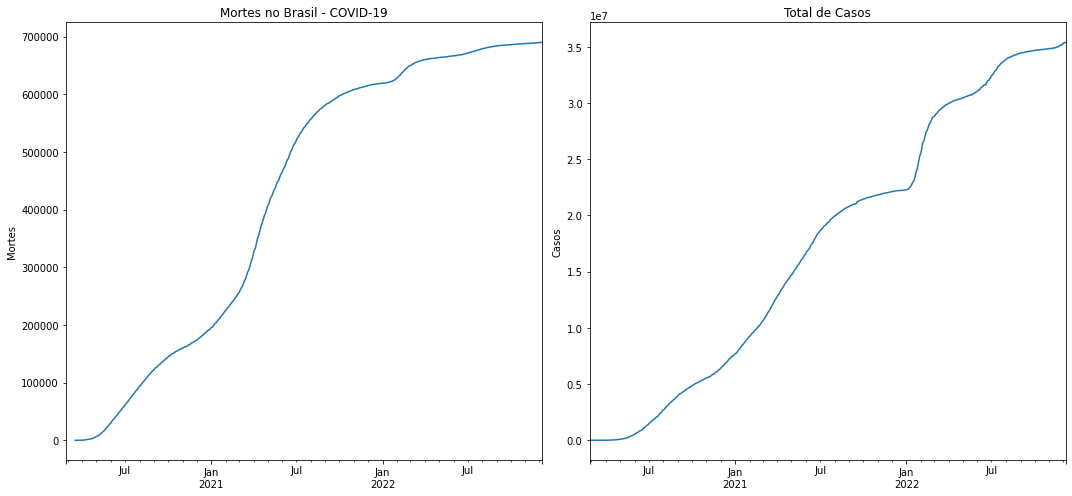

In [107]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
#df_brasil['total_deaths'].plot(kind='line',ax=ax1)
df_brasil['total_deaths'].plot(kind='line',ax=ax1)
ax1.set_title("Mortes no Brasil - COVID-19")
ax1.set_xlabel("")
ax1.set_ylabel("Mortes")

df_brasil['total_cases'].plot(kind="line",ax=ax2)
ax2.set_title("Total de Casos")
ax2.set_xlabel("")
ax2.set_ylabel("Casos")

plt.tight_layout()

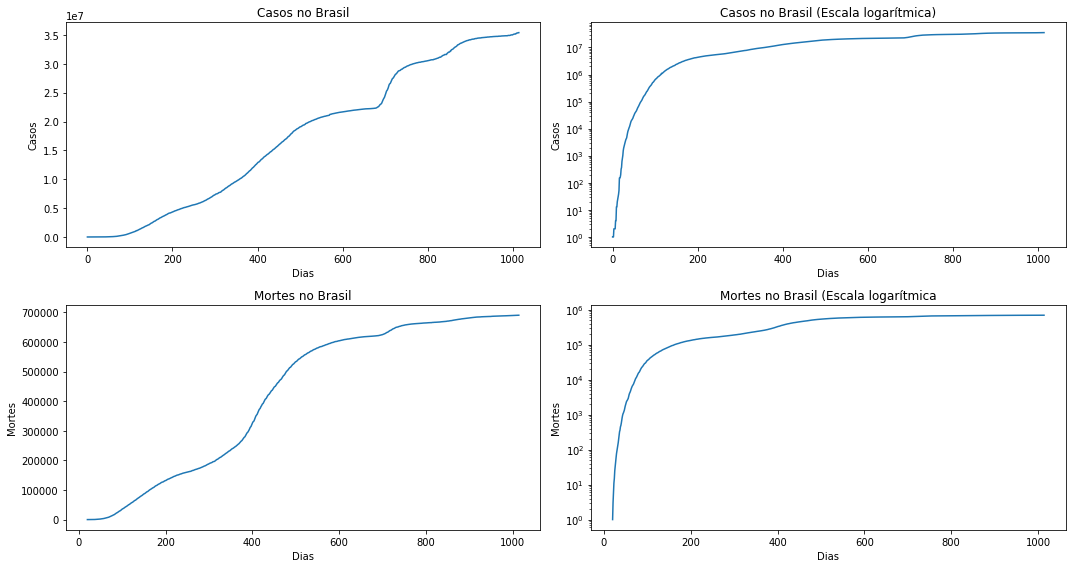

In [28]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(1015))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()



Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. Cada célula da tabela mostra a conexão entre os dois fatores. A correlação é um número que varia entre -1 e 1. Em estatística é representado pela letra r. Uma correlação pode ser positiva(r > 0), o que significa que ambas as variáveis se movem na mesma direção ou são negativas(r < 0), o que significa que se movem em direções opostas, ou seja, quando o valor de uma variável aumenta, o valor da outra variáveis diminui. A correlação também pode ser nula ou zero, o que significa que as variáveis não estão relacionadas.

Correlação positiva: ambas as variáveis mudam na mesma direção.
Correlação Nula: Nenhuma relação na mudança das variáveis
Correlação Negativa: as variáveis mudam em direções opostas.

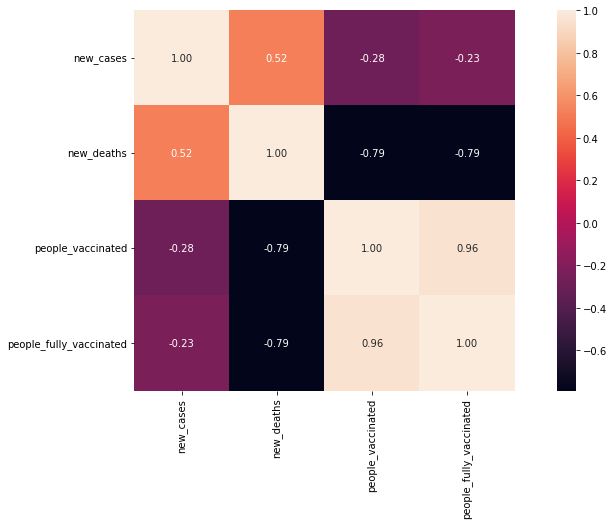

In [29]:
corr = df_brasil[['new_cases','new_deaths','people_vaccinated','people_fully_vaccinated']].corr()
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(corr,fmt='.2f', square=True,linecolor='white', annot=True);

Existe uma relação negativa bastante forte em relação a pessoas vacinadas e novas mortes, sugerindo que quanto mais pessoas vacinada menos mortes teremos.

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*